In [93]:
from minisom import MiniSom
import pandas as pd 
import numpy as np 



data = pd.read_csv("./dow_jones_index/dow_jones_index.data")

In [94]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


Preprocessing

In [95]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


for i in data.columns:
    data[i].fillna(method = "ffill",inplace = True)


# process stock
le = LabelEncoder()
data["stock"] = le.fit_transform(data["stock"])
data["stock"] = data["stock"].astype('float64')



In [96]:
# process date
for i in range(len(data["date"])):
    data["date"][i] = data["date"][i].split("/")
    data["date"][i] = int(data["date"][i][0]) * 30 + int(data["date"][i][1])
data["date"] = data["date"].astype('float64')


In [97]:
# process "open", "high","low","close","next_weeks_open","next_weeks_close"
for i in ["open", "high","low","close","next_weeks_open","next_weeks_close"]:
    for j in range(len(data["open"])):
        data[i][j] = float(data[i][j][1:])
    data[i] = data[i].astype('float64')


In [98]:
# Standardize all columns
data = preprocessing.scale(data)

In [99]:
for i in range(749):
    length = sum(map(lambda x: float(x**2), data[i]))**0.5
    for j in range(len(data[i])):
        data[i][j] = data[i][j]/length


Start SOM

In [100]:
# Initialization
data = data[1:]
som = MiniSom(10,10,16,sigma=1.5,learning_rate=0.5,neighborhood_function="gaussian",random_seed=0)
som.pca_weights_init(data)
som.train(data,1000,verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.6190762470358583


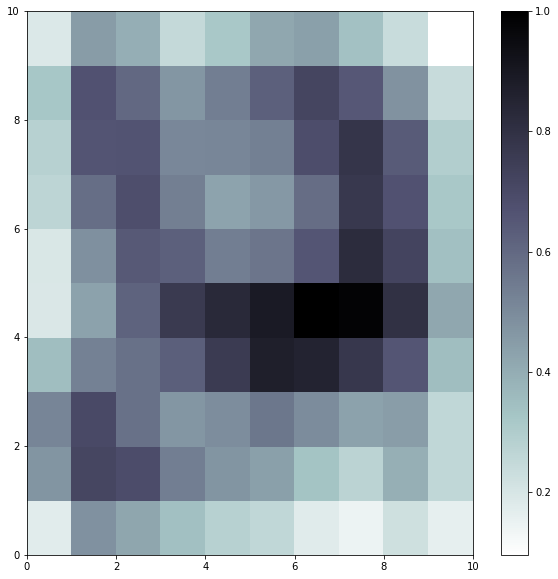

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.show()